In [1]:
2151264652%3+1

2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse

# Load data
data = pd.read_csv('../input/kt1-timeseries/data-kiem-tra-1.csv', parse_dates=['date'], index_col='date')
data = data.drop( columns = 'truong_1')

data.head()

 

,truong_2,truong_3,truong_4,truong_5
date,,,,
02.01.2013,59,22154,999.00,1
03.01.2013,25,2552,899.00,1
05.01.2013,25,2552,899.00,-1
06.01.2013,25,2554,1709.05,1
15.01.2013,25,2555,1099.00,1


In [3]:
data.shape

(481822, 4)

# **1.ARIMA VÀ SARIMA**

# **CHỌN CỘT TRƯỜNG 4 LÀM CỘT DỰ ĐOÁN** 

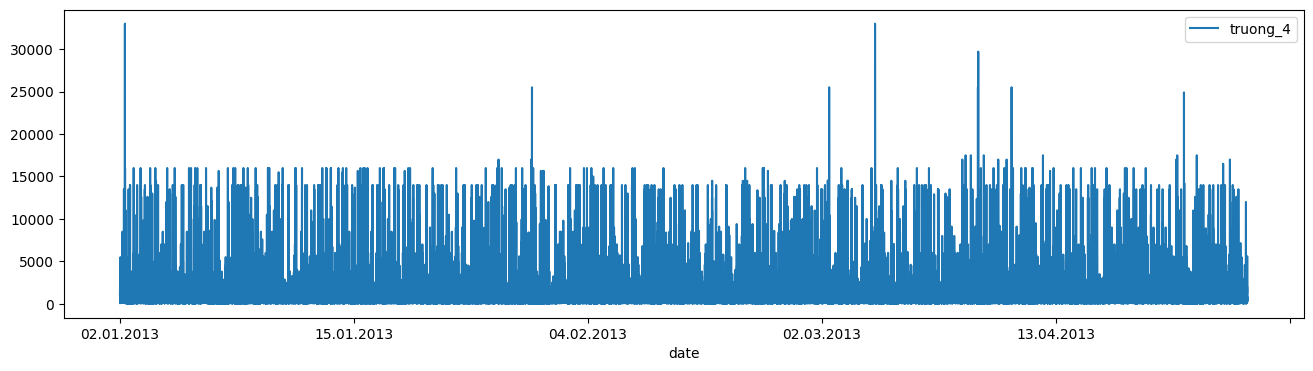

In [4]:
# Đọc dữ liệu và chỉ định cột chỉ mục thời gian
df_season = pd.read_csv('../input/kt1-timeseries/data-kiem-tra-1.csv', parse_dates=['date'], index_col='date')
df_season = df_season.drop(columns = 'truong_5') 
df_season = df_season.drop(columns = 'truong_1') 
df_season = df_season.drop(columns = 'truong_3') 
df_season = df_season.drop(columns = 'truong_2') 
# Trực quan hóa dữ liệu từ cột 'truong_4'
df_season.plot(y='truong_4', figsize=(16, 4)) 
plt.show()

In [5]:
df_season  = df_season.sort_index()

# In ra DataFrame sau khi đã sắp xếp
print(df_season)

            truong_4
date                
01.01.2013   2199.00
01.01.2013    226.00
01.01.2013   1990.00
01.01.2013    149.00
01.01.2013    799.00
...              ...
31.05.2013    290.51
31.05.2013    149.00
31.05.2013    399.00
31.05.2013    499.00
31.05.2013    499.00

[481822 rows x 1 columns]


In [6]:
# Chỉ lấy 300 mẫu đầu tiên cho tập dữ liệu huấn luyện
train = df_season[df_season.index < '2013-05-30'].tail(30000)

# Tập dữ liệu kiểm tra vẫn giữ nguyên
test = df_season[df_season.index >= '2013-05-30'].tail(30)

print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (30000, 1)
test shape:  (30, 1)


In [7]:
train.head()

,truong_4
date,
19.01.2013,349.0
19.01.2013,199.0
19.01.2013,599.0
19.01.2013,379.0
19.01.2013,899.0


In [8]:
test.head()

,truong_4
date,
31.05.2013,499.0
31.05.2013,799.0
31.05.2013,13499.0
31.05.2013,249.0
31.05.2013,419.0


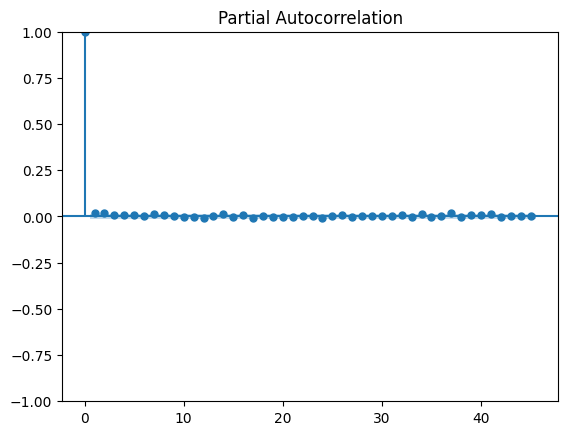

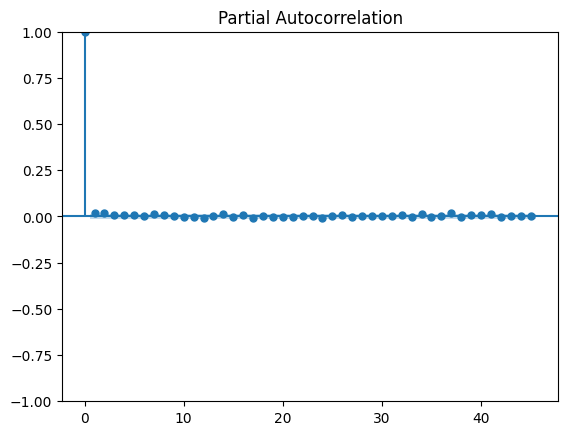

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_pacf(train)

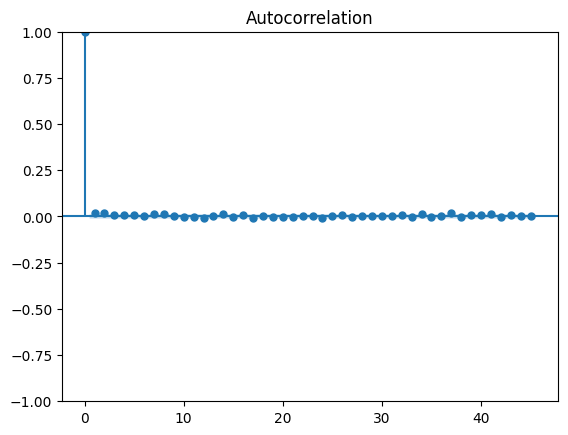

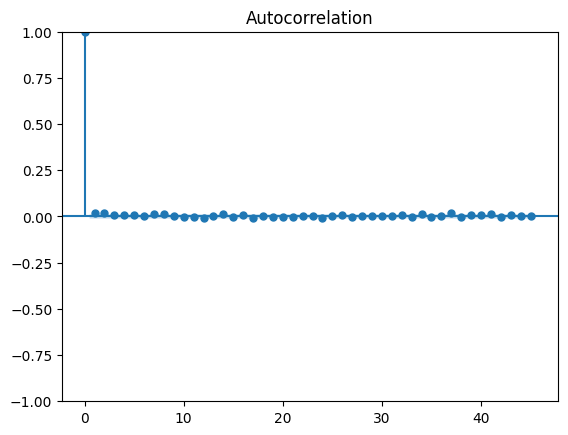

In [10]:
plot_acf(train)


In [11]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
# Xây dựng mô hình ARIMA
model_arima = ARIMA(train, order=(1,1,1))  # Ví dụ: sử dụng order=(5,1,0)
arima_results = model_arima.fit()

# Xây dựng mô hình SARIMA
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Ví dụ: sử dụng order=(1,1,1), seasonal_order=(1,1,1,12)
sarima_results = model_sarima.fit()

# Dự đoán trên tập dữ liệu kiểm tra
arima_forecast = arima_results.forecast(steps=10)
sarima_forecast = sarima_results.forecast(steps=10)

# Hiển thị dự đoán
print("ARIMA Forecast:")
print(arima_forecast)
print("\nSARIMA Forecast:")
print(sarima_forecast)


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.66202D+00    |proj g|=  7.96988D-02

At iterate    5    f=  8.58025D+00    |proj g|=  9.57245D-03

At iterate   10    f=  8.56617D+00    |proj g|=  8.91827D-03

At iterate   15    f=  8.56460D+00    |proj g|=  5.15409D-04
  ys=-1.029E+00  -gs= 9.768E-03 BFGS update SKIPPED

At iterate   20    f=  8.53896D+00    |proj g|=  9.54467D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     73      2     1     0   2.750D-02   8.525D+00
  F =   8.5246770023509590     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA Forecast:
30000    669.063263
30001    677.583359
30002    677.756171
30003    677.759676
30004    677.759747
30005    677.759749
30006    677.759749
30007    677.759749
30008    677.759749
30009    677.759749
Name: predicted_mean, dtype: float64

SARIMA Forecast:
30000    682.364536
30001    677.624888
30002    606.598697
30003    680.201520
30004    697.936069
30005    677.814863
30006    684.754937
30007    686.402303
30008    667.844615
30009    661.132876
Name: predicted_mean, dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


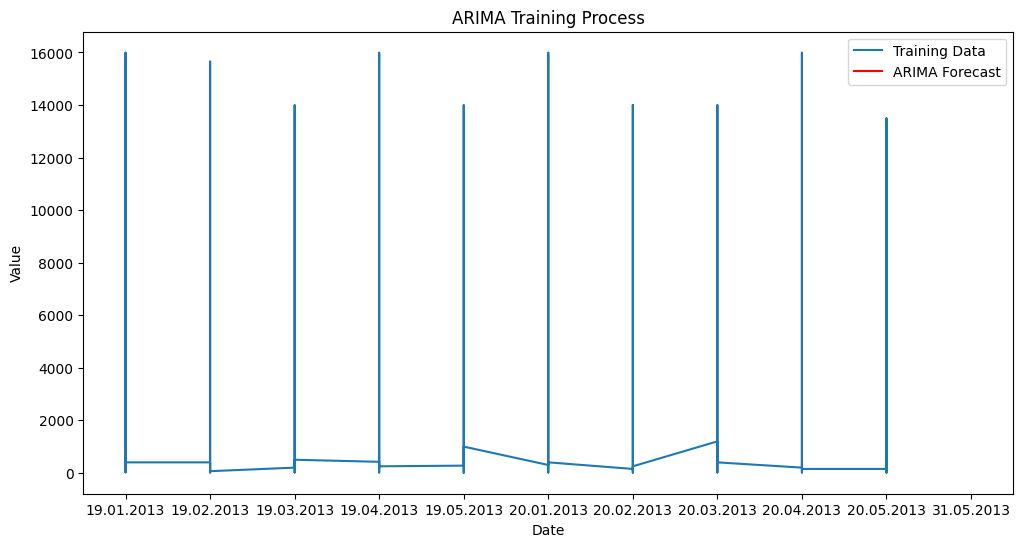

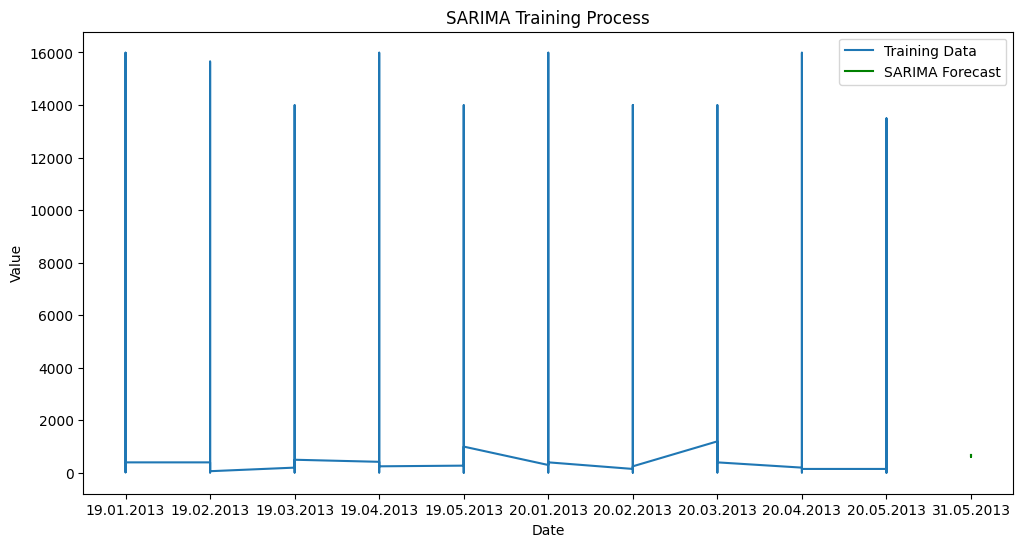

In [12]:
import matplotlib.pyplot as plt

# Trực quan hóa quá trình huấn luyện của mô hình ARIMA
plt.figure(figsize=(12, 6))

# Trực quan hóa dữ liệu huấn luyện
plt.plot(train.index, train['truong_4'], label='Training Data')

# Trực quan hóa dự đoán từ mô hình ARIMA
plt.plot(test.index[:10], arima_forecast, color='red', label='ARIMA Forecast')

plt.title('ARIMA Training Process')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Trực quan hóa quá trình huấn luyện của mô hình SARIMA
plt.figure(figsize=(12, 6))

# Trực quan hóa dữ liệu huấn luyện
plt.plot(train.index, train['truong_4'], label='Training Data')

# Trực quan hóa dự đoán từ mô hình SARIMA
plt.plot(test.index[:10], sarima_forecast, color='green', label='SARIMA Forecast')

plt.title('SARIMA Training Process')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# **2.HMM**

In [15]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from hmmlearn import hmm
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [16]:
data2 = pd.read_csv('../input/kt1-timeseries/data-kiem-tra-1.csv', parse_dates=['date'], index_col='date')

In [17]:
# Khởi tạo HMM
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)

# Huấn luyện HMM với dữ liệu quan sát
model.fit(data2)

# In ra các tham số của mô hình sau khi huấn luyện
print("Start probabilities: ", model.startprob_)
print("Transition matrix: ", model.transmat_)
print("Means: ", model.means_)
print("Covariances: ", model.covars_)

Start probabilities:  [1.00000000e+00 1.83210986e-98]
Transition matrix:  [[0.91415449 0.08584551]
 [0.6941114  0.3058886 ]]
Means:  [[1.66919816e+00 3.11772966e+01 1.01715287e+04 5.87972136e+02
  1.00000000e+00]
 [1.62450018e+00 3.12838866e+01 9.67989131e+03 1.47853217e+03
  2.54122014e+00]]
Covariances:  [[[ 1.63188778e+00  1.91072689e+00 -4.75568754e+01 -8.76685137e+00
    2.33186874e-08]
  [ 1.91072689e+00  2.51029382e+02  1.72999771e+03  2.71119970e+01
    2.32643859e-08]
  [-4.75568754e+01  1.72999771e+03  3.92678151e+07 -1.06887858e+06
    1.52101029e-08]
  [-8.76685137e+00  2.71119970e+01 -1.06887858e+06  3.51945832e+05
    2.33740880e-08]
  [ 2.33186874e-08  2.32643859e-08  1.52101029e-08  2.33740880e-08
    2.33195367e-08]]

 [[ 1.50092110e+00  1.51246180e+00  5.34171374e+02 -1.51686929e+02
    1.48944647e-01]
  [ 1.51246180e+00  2.39599590e+02  5.81441477e+03 -8.79733211e+02
    2.55548860e-01]
  [ 5.34171374e+02  5.81441477e+03  4.09136172e+07 -1.13653580e+06
    3.19452805

In [18]:
# Dự đoán trạng thái ẩn cho các quan sát hiện có
hidden_states = model.predict(data2)
print("Hidden states: ", hidden_states)

# Lấy mẫu mới từ mô hình đã huấn luyện
X, Z = model.sample(5)  # Lấy mẫu 5 quan sát mới
print("Sampled observations: ", X)
print("Sampled hidden states: ", Z)

Hidden states:  [0 0 1 ... 0 0 0]
Sampled observations:  [[ 3.43290516e+00  4.71572918e+01  1.49141377e+04 -6.83758977e+02
   1.00005178e+00]
 [ 4.02453163e+00  4.06875168e+01  1.62753773e+04  1.75308977e+02
   9.99709331e-01]
 [ 1.94473362e+00  1.87562307e+01  1.65598224e+04  1.39679528e+02
   1.00019740e+00]
 [ 1.28751014e+00  3.50086748e+01  4.92783186e+03  1.40838768e+03
   1.00030242e+00]
 [ 4.40451592e+00  3.39029857e+01  8.30965688e+03  1.52337009e+03
   9.99981542e-01]]
Sampled hidden states:  [0 0 0 0 0]


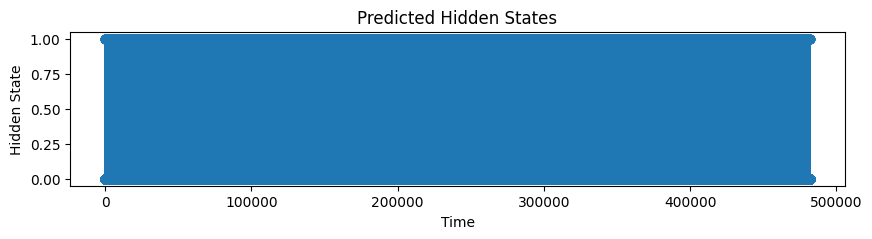

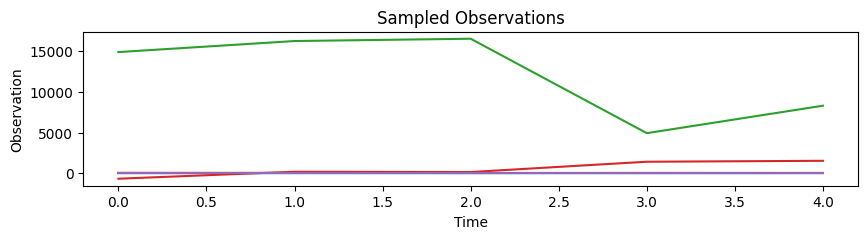

In [19]:
# Vẽ các trạng thái ẩn dự đoán
def plot_hidden_states(hidden_states, title):
    plt.figure(figsize=(10, 2))
    plt.plot(hidden_states, marker='o')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Hidden State")
    plt.show()

plot_hidden_states(hidden_states, "Predicted Hidden States")

# Vẽ các quan sát mẫu
def plot_observations(observations, title):
    plt.figure(figsize=(10, 2)) 
    plt.plot(observations)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Observation")
    plt.show()

plot_observations(X, "Sampled Observations")